In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
M2_data = pd.read_csv('M2.csv')
monetary_base_data = pd.read_csv('MonetaryBase.csv')

In [4]:
print(M2_data)
print(monetary_base_data)

            DATE       M2
0     1980-11-03   1591.4
1     1980-11-10   1592.9
2     1980-11-17   1596.3
3     1980-11-24   1597.2
4     1980-12-01   1596.1
...          ...      ...
2044  2020-01-06  15351.4
2045  2020-01-13  15397.7
2046  2020-01-20  15460.5
2047  2020-01-27  15494.7
2048  2020-02-03  15489.8

[2049 rows x 2 columns]
            DATE  BOGMBASEW
0     1975-01-08   108920.0
1     1975-01-15   107891.0
2     1975-01-22   107988.0
3     1975-01-29   106358.0
4     1975-02-05   106061.0
...          ...        ...
2349  2020-01-15  3471580.0
2350  2020-01-22  3412505.0
2351  2020-01-29  3412505.0
2352  2020-02-05  3453833.0
2353  2020-02-12  3453833.0

[2354 rows x 2 columns]


In [5]:
#print(monetary_base_data)

num_data_points = min(len(monetary_base_data), len(M2_data))
diff_in_lengths = abs(len(monetary_base_data) - len(M2_data))

monetary_base_data_since1980 = monetary_base_data.tail(len(M2_data))



weeks = []#np.empty(num_data_points)
#weeks[:] = 0
monetaryBases = []#np.empty(num_data_points)
#monetaryBases[:] = 0
m2s = []#np.empty(num_data_points)
#m2s[:] = 0

hit_2008 = False
for i in range(num_data_points):
    if ("2008" in monetary_base_data["DATE"][i]) and hit_2008 == False:
        hit_2008 = True
        first_2008 = i
    weeks.append(i)
    monetaryBases.append(monetary_base_data["BOGMBASEW"][i+diff_in_lengths])
    m2s.append(M2_data["M2"][i])
    
print(first_2008)
# JUST PLOT THESE ON THE SAME GRAPH

1721


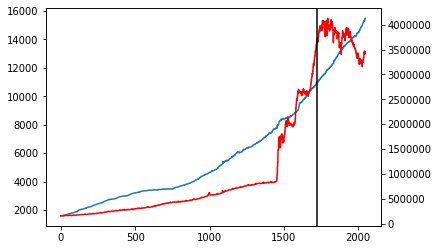

In [6]:
#plt.figure()
#plt.plot(weeks, monetaryBases)


ax = plt.gca()
ax2 = ax.twinx()

ax.plot(weeks, m2s)
ax2.plot(weeks, monetaryBases, color='red')
plt.axvline(first_2008, color="black")
#plt.plot(weeks, m2s)
#plt.plot(weeks, monetaryBases)
#plt.plot_date(monetary_base_data['DATE'], monetary_base_data['BOGMBASEW'])
#plt.plot_date(M2_data['DATE'], M2_data['M2'])
#plt.show()

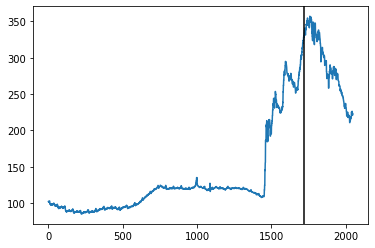

In [11]:
ratioM2MB = []
for i in range(len(weeks)):
    rat = monetaryBases[i]/m2s[i]
    ratioM2MB.append(rat)
plt.plot(weeks, ratioM2MB)
plt.axvline(first_2008, color="black")